In [1]:
#!python3 -m pip install --upgrade pip
#!python3 -m pip install --upgrade Pillow

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# load the image
im = Image.open('image.png')

# convert image to array
img = np.asarray(im)

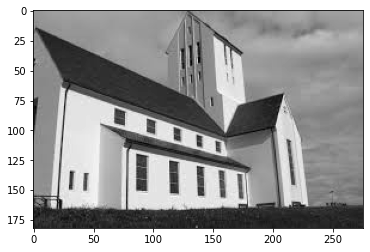

In [4]:
# show image
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)

## Edge Detection

### Implement convolution process of smoothing the image with a 5 x 5 Gaussian Filter with $\sigma$ = 1 and 2

In [5]:
# function for convolution
def convolution(f, h):
    # populate matrix with zeros that stores the output image
    g = np.zeros(f.shape)
    
    # apply the filter over each pixel in the image, calculate the value for that pixel, and store it in the output image
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            g_i_j = 0
            for u in range(-(h.shape[0] // 2), (h.shape[0] // 2) + 1):
                for v in range(-(h.shape[1] // 2), (h.shape[1] // 2) + 1):
                    if ((i - u) >= 0) and ((i - u) < f.shape[0]) and ((j - v) >= 0) and ((j - v) < f.shape[1]):
                        g_i_j = g_i_j + (h[u + (h.shape[0] // 2), v + (h.shape[0] // 2)] * f[i - u, j - v])
            g[i, j] = g_i_j
    return g

In [6]:
# function for gaussian filter
def gaussian_filter(size, sigma):
    # populate x and y matrices
    x = []
    for i in range(size):
        row = [j - (size // 2) for j in range(size)]
        x.append(row)
    x = np.array(x)
    y = x.T
    
    # calculate values of Gaussian kernel
    G = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x ** 2 + y ** 2) / (2 * sigma ** 2)))
    
    # normalize weights to sum to 1
    G = G / np.sum(G)
    G = np.round((G / G[0,0]))
    constant = 1 / np.sum(G)
    
    return constant * G

Text(0.5, 1.0, '5 x 5 Gaussian Filter with Sigma = 1')

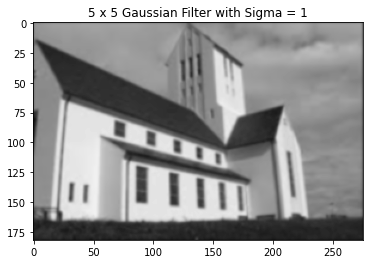

In [7]:
# get a 5 x 5 Gaussian Filter with sigma = 1
G = gaussian_filter(5, 1)

# implement convolution process of smoothing the image with the Gaussian Filter
image_sigma1 = convolution(img, G)

# plot corresponding output image
plt.imshow(image_sigma1, cmap = 'gray', vmin = 0, vmax = 255)
plt.title('5 x 5 Gaussian Filter with Sigma = 1')

Text(0.5, 1.0, '5 x 5 Gaussian Filter with Sigma = 2')

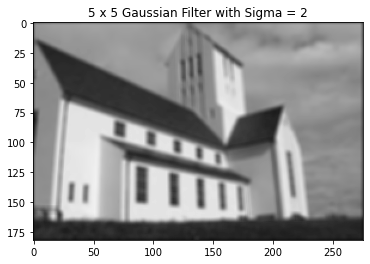

In [8]:
# get a 5 x 5 Gaussian Filter with sigma = 2
G = gaussian_filter(5, 2)

# implement convolution process of smoothing the image with the Gaussian Filter
image_sigma2 = convolution(img, G)

# plot corresponding output image
plt.imshow(image_sigma2, cmap = 'gray', vmin = 0, vmax = 255)
plt.title('5 x 5 Gaussian Filter with Sigma = 2')

### Implement convolution process of convolving 3 x 3 Sobel filters with the output images obtained using the Gaussian Filter

In [9]:
# define Sobel operators
Sx = (1 / 8) * np.matrix([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = (1 / 8) * np.matrix([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

Text(0.5, 1.0, '3 x 3 Sobel Filter with Output Image Obtained Using Gaussian Filter with Sigma = 1')

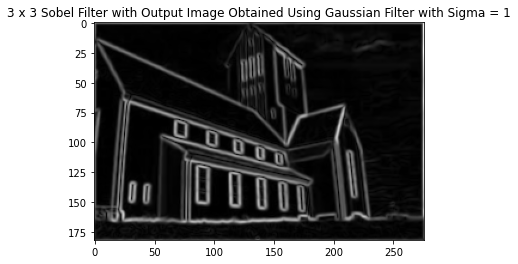

In [10]:
# implement convolution process with the Sobel operators and image_sigma1
Gx = convolution(image_sigma1, Sx)
Gy = convolution(image_sigma1, Sy)

# get gradient magnitude
G = np.sqrt(np.square(Gx) + np.square(Gy))

# plot corresponding output image
plt.imshow(G, cmap = 'gray')
plt.title('3 x 3 Sobel Filter with Output Image Obtained Using Gaussian Filter with Sigma = 1')

Text(0.5, 1.0, '3 x 3 Sobel Filter with Output Image Obtained Using Gaussian Filter with Sigma = 2')

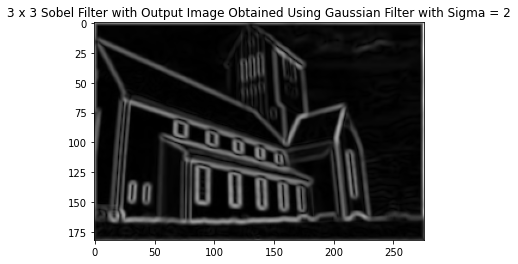

In [11]:
# implement convolution process with the Sobel operators and image_sigma2
Gx = convolution(image_sigma2, Sx)
Gy = convolution(image_sigma2, Sy)

# get gradient magnitude
G = np.sqrt(np.square(Gx) + np.square(Gy))

# plot corresponding output image
plt.imshow(G, cmap = 'gray')
plt.title('3 x 3 Sobel Filter with Output Image Obtained Using Gaussian Filter with Sigma = 2')

### Implement convolution process of convolving the image with the Gaussian derivative filters (5 x 5 filters and for $\sigma$ = 1 and 2)

In [12]:
# function for calculating the derivative of Gaussian
def gaussian_derivative(size, sigma):
    # populate x and y matrices
    x = []
    for i in range(size):
        row = [j - (size // 2) for j in range(size)]
        x.append(row)
    x = np.array(x)
    
    y = []
    for i in range(size):
        row = [(size // 2) - j for j in range(size)]
        y.append(row)
    y = np.array(y)
    y = y.T
    
    # calculate derivative of Gaussian with respect to x and y
    dGdx = (-(x / (sigma ** 2))) * np.exp(-((x ** 2 + y ** 2) / (2 * sigma ** 2)))
    dGdy = (-(y / (sigma ** 2))) * np.exp(-((x ** 2 + y ** 2) / (2 * sigma ** 2)))
    
    return dGdx, dGdy

Text(0.5, 1.0, '5 x 5 Gaussian Derivative Filter with Sigma = 1')

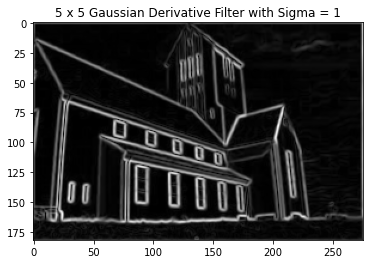

In [13]:
# get derivative of Gaussian with respect to x and y where sigma = 1
dGdx, dGdy = gaussian_derivative(5, 1)

# implement convolution process with the Gaussian derivative filters
Hx = convolution(img, dGdx)
Hy = convolution(img, dGdy)

# get gradient magnitude
H = np.sqrt(np.square(Hx) + np.square(Hy))

# plot corresponding output image
plt.imshow(H, cmap = 'gray')
plt.title('5 x 5 Gaussian Derivative Filter with Sigma = 1')

Text(0.5, 1.0, '5 x 5 Gaussian Derivative Filter with Sigma = 2')

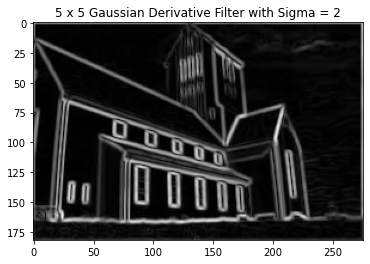

In [14]:
# get derivative of Gaussian with respect to x and y where sigma = 2
dGdx, dGdy = gaussian_derivative(5, 2)

# implement convolution process with the Gaussian derivative filters
Hx = convolution(img, dGdx)
Hy = convolution(img, dGdy)

# get gradient magnitude
H = np.sqrt(np.square(Hx) + np.square(Hy))

# plot corresponding output image
plt.imshow(H, cmap = 'gray')
plt.title('5 x 5 Gaussian Derivative Filter with Sigma = 2')

## Corner Detection

### Implement Harris Corner Detection algorithm

In [15]:
# apply Gaussian filter to image
G = gaussian_filter(5, 1)
image = convolution(img, G)

In [16]:
# spatial derivative calculation
Sx = (1 / 8) * np.matrix([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = (1 / 8) * np.matrix([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Ix = convolution(image, Sx)
Iy = convolution(image, Sy)

In [17]:
# structure tensor setup (M)
IxIx = Ix ** 2
IxIy = Ix * Iy
IyIy = Iy ** 2

In [18]:
# corner response calculation
k = 0.06
corner_response = np.zeros(image.shape)
window_size = 3

# calculate the corner response for each pixel in the image
for x in range(window_size // 2, image.shape[0] - window_size // 2):
    for y in range(window_size // 2, image.shape[1] - window_size // 2):
        Sxx = np.sum(IxIx[x - window_size // 2: x + 1 + window_size // 2, y - window_size // 2: y + 1 + window_size // 2])
        Sxy = np.sum(IxIy[x - window_size // 2: x + 1 + window_size // 2, y - window_size // 2: y + 1 + window_size // 2])
        Syy = np.sum(IyIy[x - window_size // 2: x + 1 + window_size // 2, y - window_size // 2: y + 1 + window_size // 2])
        M = np.matrix([[Sxx, Sxy], [Sxy, Syy]])
        eigenvalues, eigenvectors = np.linalg.eig(M)
        det_M = eigenvalues[0] * eigenvalues[1]
        trace_M = eigenvalues[0] + eigenvalues[1]
        R = det_M - (k * trace_M ** 2)
        corner_response[x, y] = R

Text(0.5, 1.0, 'Corner Response Map')

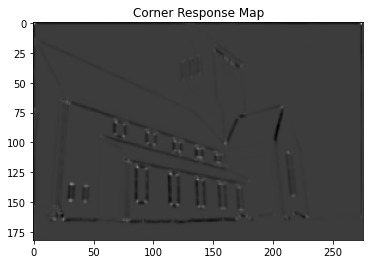

In [19]:
# plot the corner response map
plt.imshow(corner_response, cmap = 'gray')
plt.title('Corner Response Map')

Text(0.5, 1.0, 'Non-Maximum Suppression Output')

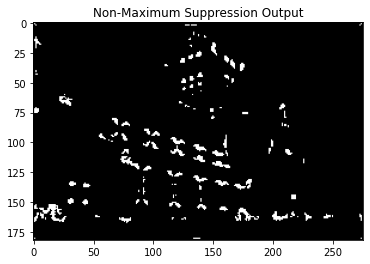

In [20]:
# plot the non-maximum suppression output
threshold = 100000
corners = np.zeros(corner_response.shape)
corners[corner_response > threshold] = 255
plt.imshow(corners, cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Non-Maximum Suppression Output')